# Background/Introduction

Using data collected by buoys on oceanic wave patterns over a 30-month period, we will be looking at data dealing with wave height, energy, frequency, temperature, etc. during half hour intervals and attempting to find interactions between these columns, as well as plotting and predicting the wave pattern in the future given certain parameters base on the collected data. These are our main goals going into the research. To find interactions between data columns, if any exist (ex. Peak wave height and average wave height).Using the location and direction of the wave currents, being able to plot the patterns of the waves. Plot the patterns of ocean currents throughout a calendar year. Predict information about future wave patterns given a set of parameters such as time of year or ocean temperature. After analyzing what time and temperatures occur with the waves, it would be in our best interest if we could also investigate if they are related to the time and temperature that sharks often would attack. If there, is a relationship between shark attacks to wave occurrence we can see when it is safe to surf as well as should surfing not even be an option during certain times of the day / seasons. We know that shark attacks are not predictable so far because almost all beaches have shark nets for protection. So almost all shark attacks are random.

We plan to use our data to see if these attacks are more than random occurrences. We found two datasets from kaggle that would be very beneficial for our project. The first dataset has 24,000 rows and 6 columns. While the second dataset has 511 rows and 11 columns .I plan to collect more data as the project goes on because the more the better. For now, I have enough data to move forward in a positive direction. There is many data to work with so it should come out very clean and consistent. I haven’t recently change attributes of the waves dataset to make it easier to understand for anyone not familiar with wave terms. Any errors I did have in my data I either manually fixed or wrote a function that would clean it up. So far in my data I did not have any surprises. The majority of shark attacks occur near the shore and in the surf zone because their natural preys live in these areas. But attacks also take place in steep underwater drop-offs, where divers often swim. The wave height should not be a surprise where the attacks will take place.


# Data

I plan to compare years as well as months with my main columns such as significant wave height and sea sruface temperature ,to see any patterns that may be useful. I would like to study the waves specifically by month as I believe the colder months of the year such as november - march would have either a higher wave impact from the weather or even a lower impact from the weather.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import numpy as n
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import plotly.plotly as py
#import plotly.tools as tls
import seaborn as sns
import random 

from math import sqrt  

import calendar
import datetime 

In [2]:
!sudo pip install --upgrade pip
!sudo pip install xlrd

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:380: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning,
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:139: InsecurePlatformWarning: A true SSLContext object is not available. This

In [3]:
%matplotlib inline   

In [4]:
print("Loading in the datasets")
Waves1 = pd.read_csv('Buoys-Waves.csv')
Control = pd.read_csv('control.csv')


Loading in the datasets


In [5]:
Waves1 = Waves1.rename(columns = {'Date/Time' : 'time','Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})
Waves1 = Waves1[Waves1['maximum_wave_height'] != -99.9]
Waves1 = Waves1[Waves1['peak_direction'] != -99.9]
Waves1 = Waves1[Waves1['sea_surface_temperature'] != -99.9]
Waves1.head()  

,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
2,1/1/2017 1:00,0.763,1.15,4.520,5.513,49.0,25.65
3,1/1/2017 1:30,0.770,1.41,4.582,5.647,75.0,25.50
4,1/1/2017 2:00,0.747,1.16,4.515,5.083,91.0,25.45
5,1/1/2017 2:30,0.718,1.61,4.614,6.181,68.0,25.45
6,1/1/2017 3:00,0.707,1.34,4.568,4.705,73.0,25.50


In this section I had to remove any -99.9 values that were of no use to the data. 
I also had to rename columns to much more appropriate names.
Any unneccesary data could throw off data numbers. They also could throw off graph results resulting in data way off the chart or data to low. 

In [6]:

Waves1["time"] = pd.to_datetime(Waves1["time"])
Waves1["year"] = Waves1["time"].astype(str).str[0:4]
Waves1["year"] = Waves1["year"].astype(int)

Waves1["time1"] = Waves1["time"].astype(str).str[11:16]
Waves1["month"] = Waves1["time"].astype(str).str[5:7]
Waves1.head()

,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature,year,time1,month
2,2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65,2017,01:00,01
3,2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50,2017,01:30,01
4,2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45,2017,02:00,01
5,2017-01-01 02:30:00,0.718,1.61,4.614,6.181,68.0,25.45,2017,02:30,01
6,2017-01-01 03:00:00,0.707,1.34,4.568,4.705,73.0,25.50,2017,03:00,01


This code allows me to break up the time column because it was not useful to me, and make 
individual columns such as month,year,and time. This was very helpful to me when it was time to 
make graphs as I was able to individually look at months of a certain year. 

In [7]:
Waves1.shape

(43454, 10)

My waves dataset comes with 10 columns that result in over 40,000 rows of information. This allows me a lot of information to work with. It also allows me to create different types of graphs.

In [8]:
list(Waves1)

['time',
 'significant_wave_height',
 'maximum_wave_height',
 'zero_wave_period',
 'peak_wave_period',
 'peak_direction',
 'sea_surface_temperature',
 'year',
 'time1',
 'month']

These are the columns I will be working with in my dataset. 
Significant wave height means  is defined as the mean wave height. 
The maximum wave height is defined as the tallest wave height. 
Wave period is the distance between two waves passing through a stationary point. 
The peak wave period is defined as the wave period associated with the most energetic waves
in the total wave spectrum at a specific point.
Peak direction is defined as the mean of all the individual wave 
directions in a time-series representing a certain sea state. 
Sea surface temperature is defined as the water temperature close to the ocean's surface.The year is what years I will be looking at for the data ,which will be 2017 through 2019. 
The months are the months of the year which are January - December. 

In [9]:
print("Checking the dataset for any null values")
Waves1.isnull().sum()

Checking the dataset for any null values


time                       0
significant_wave_height    0
maximum_wave_height        0
zero_wave_period           0
peak_wave_period           0
peak_direction             0
sea_surface_temperature    0
year                       0
time1                      0
month                      0
dtype: int64

First I had to check my dataset for any null values that could throw off plotting information. My dataset seems clean with no problems or missing values. 

In [10]:
Waves1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43454 entries, 2 to 43727
Data columns (total 10 columns):
time                       43454 non-null datetime64[ns]
significant_wave_height    43454 non-null float64
maximum_wave_height        43454 non-null float64
zero_wave_period           43454 non-null float64
peak_wave_period           43454 non-null float64
peak_direction             43454 non-null float64
sea_surface_temperature    43454 non-null float64
year                       43454 non-null int64
time1                      43454 non-null object
month                      43454 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 3.6+ MB


In this section I looked into the actual results of the dataset . 

In [11]:
aa = Waves1.significant_wave_height.max()
print(aa)
bb = Waves1.significant_wave_height.min()
print(bb)
cc = Waves1.significant_wave_height.mean()
print(cc) 

4.257
0.294
1.2377985916141205


The significant wave height max is 4.2 meters . 
The minimum wave height is 0.2 meters.
The mean wave height is 1.2 meters.

In [12]:
dd = Waves1.maximum_wave_height.max()
print(dd)
ee = Waves1.maximum_wave_height.min()
print(ee)
ff = Waves1.maximum_wave_height.mean()
print(ff)

7.906000000000001
0.51
2.090125258894463


The wave height max of the dataset is 7.9 meters. 
The smallest wave in the data is 0.5 meters.
The mean of the tallest waves is 2.1 meters.


Sea state is the general condition of the free surface on a large body of water.
A sea state is characterized by statistics, including the wave height, period, and power spectrum.
The sea state varies with time, as the wind conditions or swell conditions change. The sea state can 
either be assessed by an experienced observer, like a trained mariner, or through instruments like weather buoys, 
wave radar or remote sensing satellites.
According to the WMO Sea State Code wave height from 0 meters to 2.5 meters
are seen as calm to moderate wave sizes. 2.5 meters to 14 meters
is seen as rough to very high wave height. The max significant wave height falls under
very rough wave size . The maximum wave height is 7.9 meters high
,which falls under the moderately high wave size.

In [13]:
gg = Waves1.peak_wave_period.max()
print(gg)
hh = Waves1.peak_wave_period.min()
print(hh)
ii = Waves1.peak_wave_period.mean()
print(ii)

21.121
2.72
9.011971602154002


The maximum peak wave period is 21.1.
The minimum peak wave period is 2.7.
The average peak wave period is 9.0. 

In [14]:
jj = Waves1.sea_surface_temperature.max()
print(jj)
kk = Waves1.sea_surface_temperature.min()
print(kk)
ll = Waves1.sea_surface_temperature.mean()
print(ll) 

28.65
19.8
23.949640999677822


The indian ocean has the warmest temperatures of the worlds oceans. The waves dataset happens to cover waves in australia which is part of the indian ocean. In the winter the indian ocean is said 
to have unstable weather , dangerous conditions and high waves. The maximum sea surface temperature 
28.6  degrees . This number is important, because for a tropical cyclone to develop the sea temperature 
needs to be at least 28 degrees celcius. The minimum sea surface temperature in the dataset is 19.8 
degrees celcius. The mean sea surface temperature of the data was 23.9 degrees celcius.  

In [15]:
mm = Waves1.month.max()
print(mm)
nn = Waves1.month.min()
print(nn)

12
01


For the waves dataset I will be looking at all months of the year. 
The variables for the months correspond to the months of a calander . For example 01 will be 
the first month of the year which is January, while 12 will be the last month of the year December.
This is important for me as I will need to observe all the months 
if I want accurate and consistent data. The months will have an impact on wave height, 
temperature of the sea, as well as the direction of the waves. I predict that the winter months will have a larger wave height than that of summer months. For surfers wiping out in the warm summer weather can almost be a pleasant experience, whereas wiping out in cold,icy waves can be torturous for surfers.   

In [16]:
oo = Waves1.year.max()
print(oo)
pp = Waves1.year.min()
print(pp)

2019
2017


The dataset covers the years 2017-2019. 

# Graph Results

In my notebook I have displayed several graphs to link the relationships of the waves dataset. I first made a density plot of the “significant wave height”. I used a density plot because it visualizes the distribution of data over a continuous interval or time period. With this I was able to put a graph together to look at the significant wave height over time and at what time it is the highest, lowest and in the middle. I also made a line plot of the sea surface temperature and the maximum wave height. I made this plot to show the frequency of the maximum wave height at certain sea surface temperatures. This will allow me to determine what temperature the waves are the highest as well as the lowest. The relationship between maximum wave height and sea surface temperature is steady up and down. With this information I can further link the shark attacks wave temperature to the maximum wave height temperature. I also made a line plot of the sea surface temperature and the significant wave height. I made this plot to show the frequency of the significant wave height at certain sea surface temperatures. The relationship is very similar to that of the maximum wave height and the sea surface temperature relationship. I also did a regression plot for the significant wave height and sea surface temperature. I made this plot so I could better look at the relationship and to see more if they are related with each other.

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1323: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


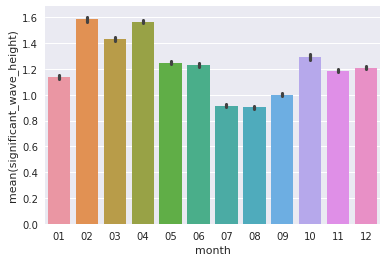

In [17]:
sns.barplot(Waves1['month'], Waves1['significant_wave_height'] )
plt.show()

This graph is an average of the years 2017-2019.
This graph displays the significant wave height over a 12 month period. The months of Febuary and April have the heighest significant wave height, while July and August have the smallest significant
wave height. The colder months of the year seem to have a lower significant wave height over the years.  

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1323: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


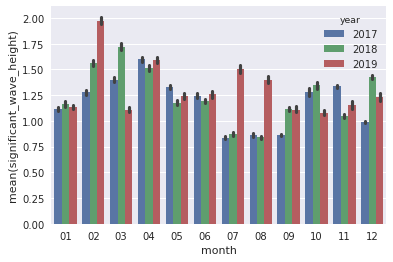

In [18]:
sns.barplot(Waves1['month'], Waves1['significant_wave_height'],Waves1['year'] )
plt.show()

This graph is an extended version of the one above, but it includes the years 
instead of taking the average of them. This graph shows in the months of July and August for the year 2019
that there is a significant jump in the data. The significant wave height in the year 2019 is almost
double that of 2017 and 2018. The month of January is the lowest over all the years . The months of Febuary,March,, and April are consistently the highest for the significant wave height. The months of September,October,November and December are all relatively the same for significant wave height. 

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


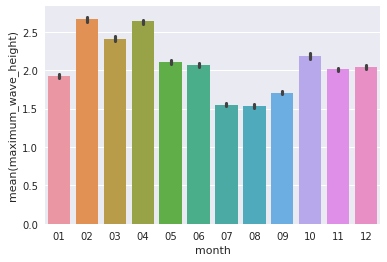

In [19]:
sns.barplot(Waves1['month'], Waves1['maximum_wave_height'] )
plt.show()

This graph is an average of the years 2017-2019.This graph displays the maximum wave height over a 12 month period. The months of Febuary and April have the heighest maximum wave height, while july and august have the smallest maximum wave height. The months of May and June are very similar to the months of September,October, and December.  

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


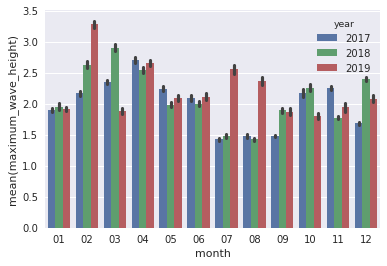

In [20]:

sns.barplot(Waves1['month'], Waves1['maximum_wave_height'],Waves1['year'] )
plt.show()

This graph is an extended version of the one above, but it includes the years instead of taking the average of them. This graph shows in the months of July and August for the year 2019 that there is a significant jump in the data. The maximum wave height in the year 2019 is almost double that of 2017 and 2018. The months of May and June are very similar to the months of September,October, and December.  

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


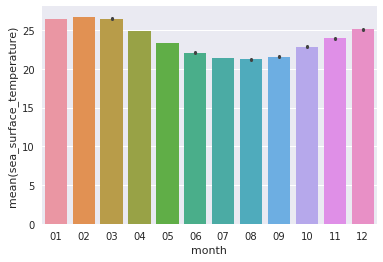

In [21]:
sns.barplot(Waves1['month'], Waves1['sea_surface_temperature'] )
plt.show()

This graph is an average of the years 2017-2019.This graph displays the average sea surface temperature over a 12 month period. The months of January,Febuary, and March have the highest average sea surface temperature, while July and August have the lowest sea surface temperature. The winter months all seem to have the highest sea surface temperature. 

Bar graph shows average sea surface temperature for the years 2017-2019 over each month 


/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


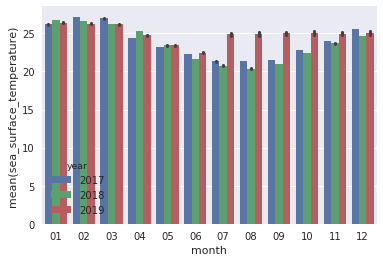

In [22]:
print("Bar graph shows average sea surface temperature for the years 2017-2019 over each month ")
sns.barplot(Waves1['month'], Waves1['sea_surface_temperature'],Waves1['year'] )
plt.show()

This graph is an extended version of the one above,
but it includes the years instead of taking the average of them. 
This graph displays that in January,Febuary, and March the sea temperature is the highest. 
It also shows in the year 2019 that in July and August it is much higher that what it had  
been in 2017 and 2018. Towards the summer months May-August the sea surface temperature is the lowest
compared to the other months of the year.


/usr/local/lib/python3.4/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


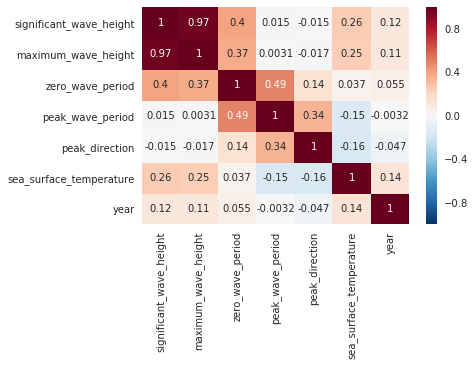

In [23]:
sns.heatmap(Waves1.corr(), annot=True)  

My heatmap displays the correlations of my variables and how they correspond to each other.
I can see that significant wave height has a good correlation with every variable except peak direction.
This is common because a wave height would not have an effect on the wave direction. I can also see 
maximum wave height also does not have an effect on peak direction. I noticed that sea surface temperature
does not have an effect on the peak wave period or the peak direction. This is not what I expected especially for the peak direction.
I had thought that sea surface temperature would surely effect peak direction. 


Shows the average wave height from 2017-2019 throughout all 12 months of the year
AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,1.112290,1.276721,1.399726,1.599378,1.329685,1.242991,0.836591,0.866212,0.863192,1.282619,1.335367,0.991186
2018,1.163499,1.562165,1.722408,1.513461,1.175983,1.190878,0.876109,0.842743,1.116912,1.344783,1.046813,1.426449
2019,1.133142,1.973201,1.105864,1.593763,1.239791,1.256988,1.505330,1.400917,1.109806,1.079667,1.151177,1.231104


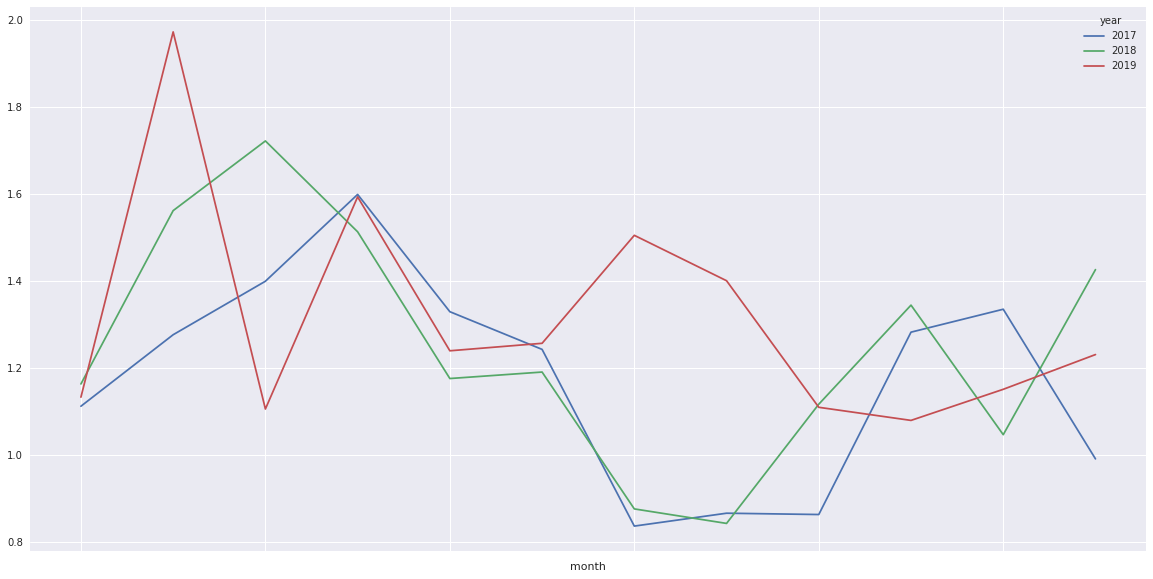

In [24]:
print("Shows the average wave height from 2017-2019 throughout all 12 months of the year")
print(Waves1.pivot_table('significant_wave_height', index="month",columns = 'year').plot(figsize=(20,10)))
Waves1[Waves1.significant_wave_height >0].pivot_table('significant_wave_height', index='year',columns = "month")


This line graph displays the average wave height from 2017-2019 throughout all 12 months of the year.
The month of Febuary and the year 2019 sticks out from the rest of the data. The average wave height for that month
is 1.9 meters high which is much larger than the year 2017 at 1.2 meters and the year 2018 at 1.5 meters high. The years of 2017 and 2018 both have similar to data throughout the months. 2018 has a higher average wave height in the winter compared to the year 2017 and 2019. 

Shows the average sea temperature by year from 2017-2019 throughout all 12 months of the year
AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,26.194609,27.177527,26.961160,24.399408,23.186741,22.286822,21.326078,21.379568,21.470537,22.859535,23.966900,25.586186
2018,26.742881,26.589829,26.265172,25.342708,23.418316,21.630694,20.764166,20.390108,20.994019,22.426236,23.690985,24.635714
2019,26.382846,26.273535,26.175881,24.770826,23.477982,22.463581,24.888368,24.911285,24.998958,25.065972,24.986111,25.032986


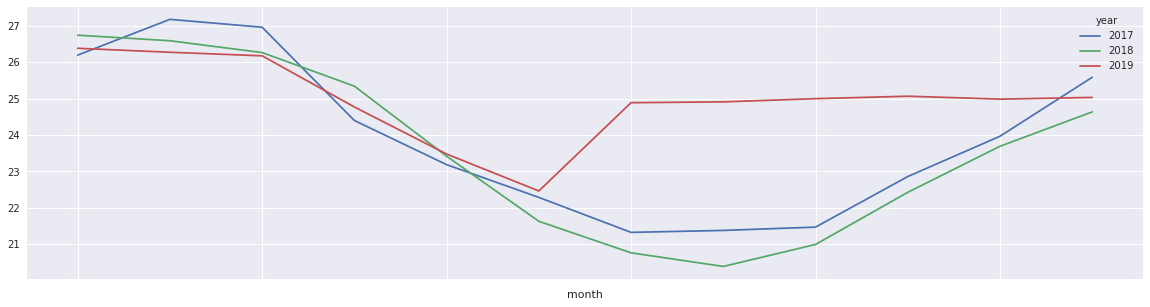

In [25]:
print("Shows the average sea temperature by year from 2017-2019 throughout all 12 months of the year") 
print(Waves1.pivot_table('sea_surface_temperature', index="month",columns = 'year').plot(figsize=(20,5)))
Waves1[Waves1.sea_surface_temperature >0].pivot_table('sea_surface_temperature', index='year',columns = "month") 

This line graph displays the average sea surface temperature from 2017-2019 throughout all 12 months of the year.
The year 2017 had reached the highest temperature overall at 27.1 degrees celcius. The year 2018 looks very identical to that of the year 2017.
The year 2019 starts off similar to 2017 and 2018 then slowly branches off around the summer months of the year.

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


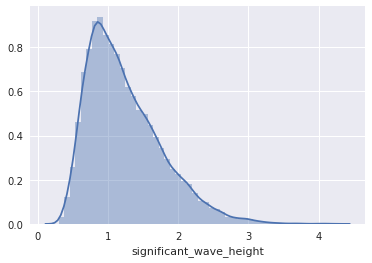

In [26]:
sns.distplot( Waves1["significant_wave_height"] )

The above graph shows a distribution plot for significant wave height. The graph shows that all the variables are well distributed.It also displays that around 1-2 meters is the average significant wave height. 

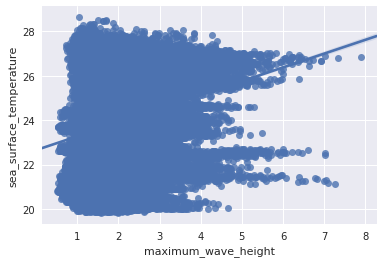

In [27]:

sns.regplot(x=Waves1["maximum_wave_height"],y=Waves1["sea_surface_temperature"])

The above graph shows the relationship between sea surface temperature as well as maximum wave height.
From my heatmap I was able to determine that sea surface temperature and maximum wave height did have a strong correlation. 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


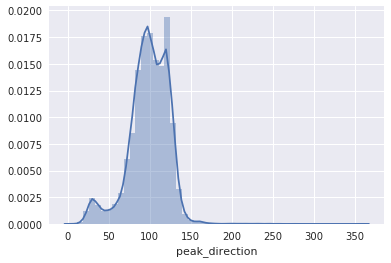

In [28]:
sns.distplot( Waves1["peak_direction"] )


The above graph shows a distribution plot for the peak direction. 
The graph shows that all the variables are well distributed.


/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


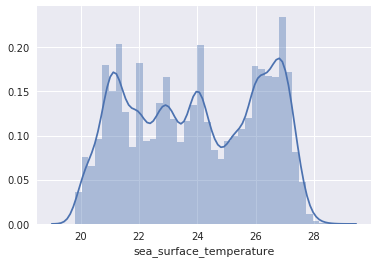

In [29]:
sns.distplot( Waves1["sea_surface_temperature"] )


The above graph shows a distribution plot for sea surface temperature. The graph shows that all the variables are well distributed.It also displays that around 27 degrees celcius is the average sea surface temperature. 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


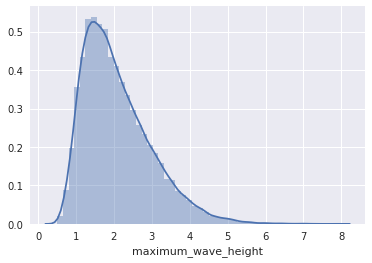

In [30]:
sns.distplot( Waves1["maximum_wave_height"] )


The above graph shows a distribution plot for maximum wave height. The graph shows that all the variables are well distributed.It also displays that around 2 meters is the average maximum wave height. 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


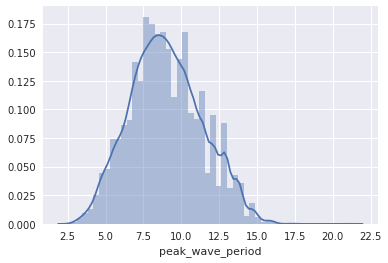

In [31]:
sns.distplot( Waves1["peak_wave_period"] )


The above graph shows a distribution plot for the peak wave period. The graph shows that all the variables are well distributed.It also displays that around 7.5 - 10 meters is the average peak wave period. 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


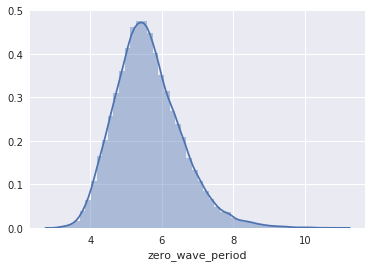

In [32]:
sns.distplot( Waves1["zero_wave_period"] )


The above graph shows a distribution plot for the zero wave period. The graph shows that all the variables are well distributed.It also displays that around 6 meters is the average zero wave period. 

In conclusion, I have gathered a lot of data which I am still excited to work around. At first I thought my whole project would be on waves which did not catch my interest. Then I realized I could join my waves dataset with a shark dataset. By doing this I could have even more data as well as more conclusions to why certain waves occur how they do and if it has an impact on certain creatures around them such as sharks.